## Canonical Correlation Analysis

**Canonical Correlation Analysis (CCA):**
- CCA is a statistical method used to understand the relationship between two sets of variables by finding linear combinations of each set that are maximally correlated.
- It helps in studying the correlation between two multivariate datasets, identifying patterns in both sets simultaneously.

**First Use in Agriculture:**
- CCA was first applied in agriculture in the early 20th century, around the 1930s.
- It was used primarily to explore relationships between different agricultural variables, such as soil properties and crop yields.

**Country:**
- The United States, during the 1930s, saw the application of CCA in agricultural research.

**Key Applications in Agriculture:**
- **Soil-Plant Relationships**: Identifying correlations between soil properties (pH, texture, etc.) and plant growth factors (yield, root growth).
- **Crop Yield Prediction**: Linking climatic conditions (temperature, rainfall) with crop yield variations.
- **Precision Agriculture**: Analyzing spatial and temporal data to optimize farming practices and resource use.
- **Nutrient Management**: Studying the impact of various fertilizers on soil health and crop production.


Generated 100000 records with 25 parameters and saved to soil_plant_data.csv


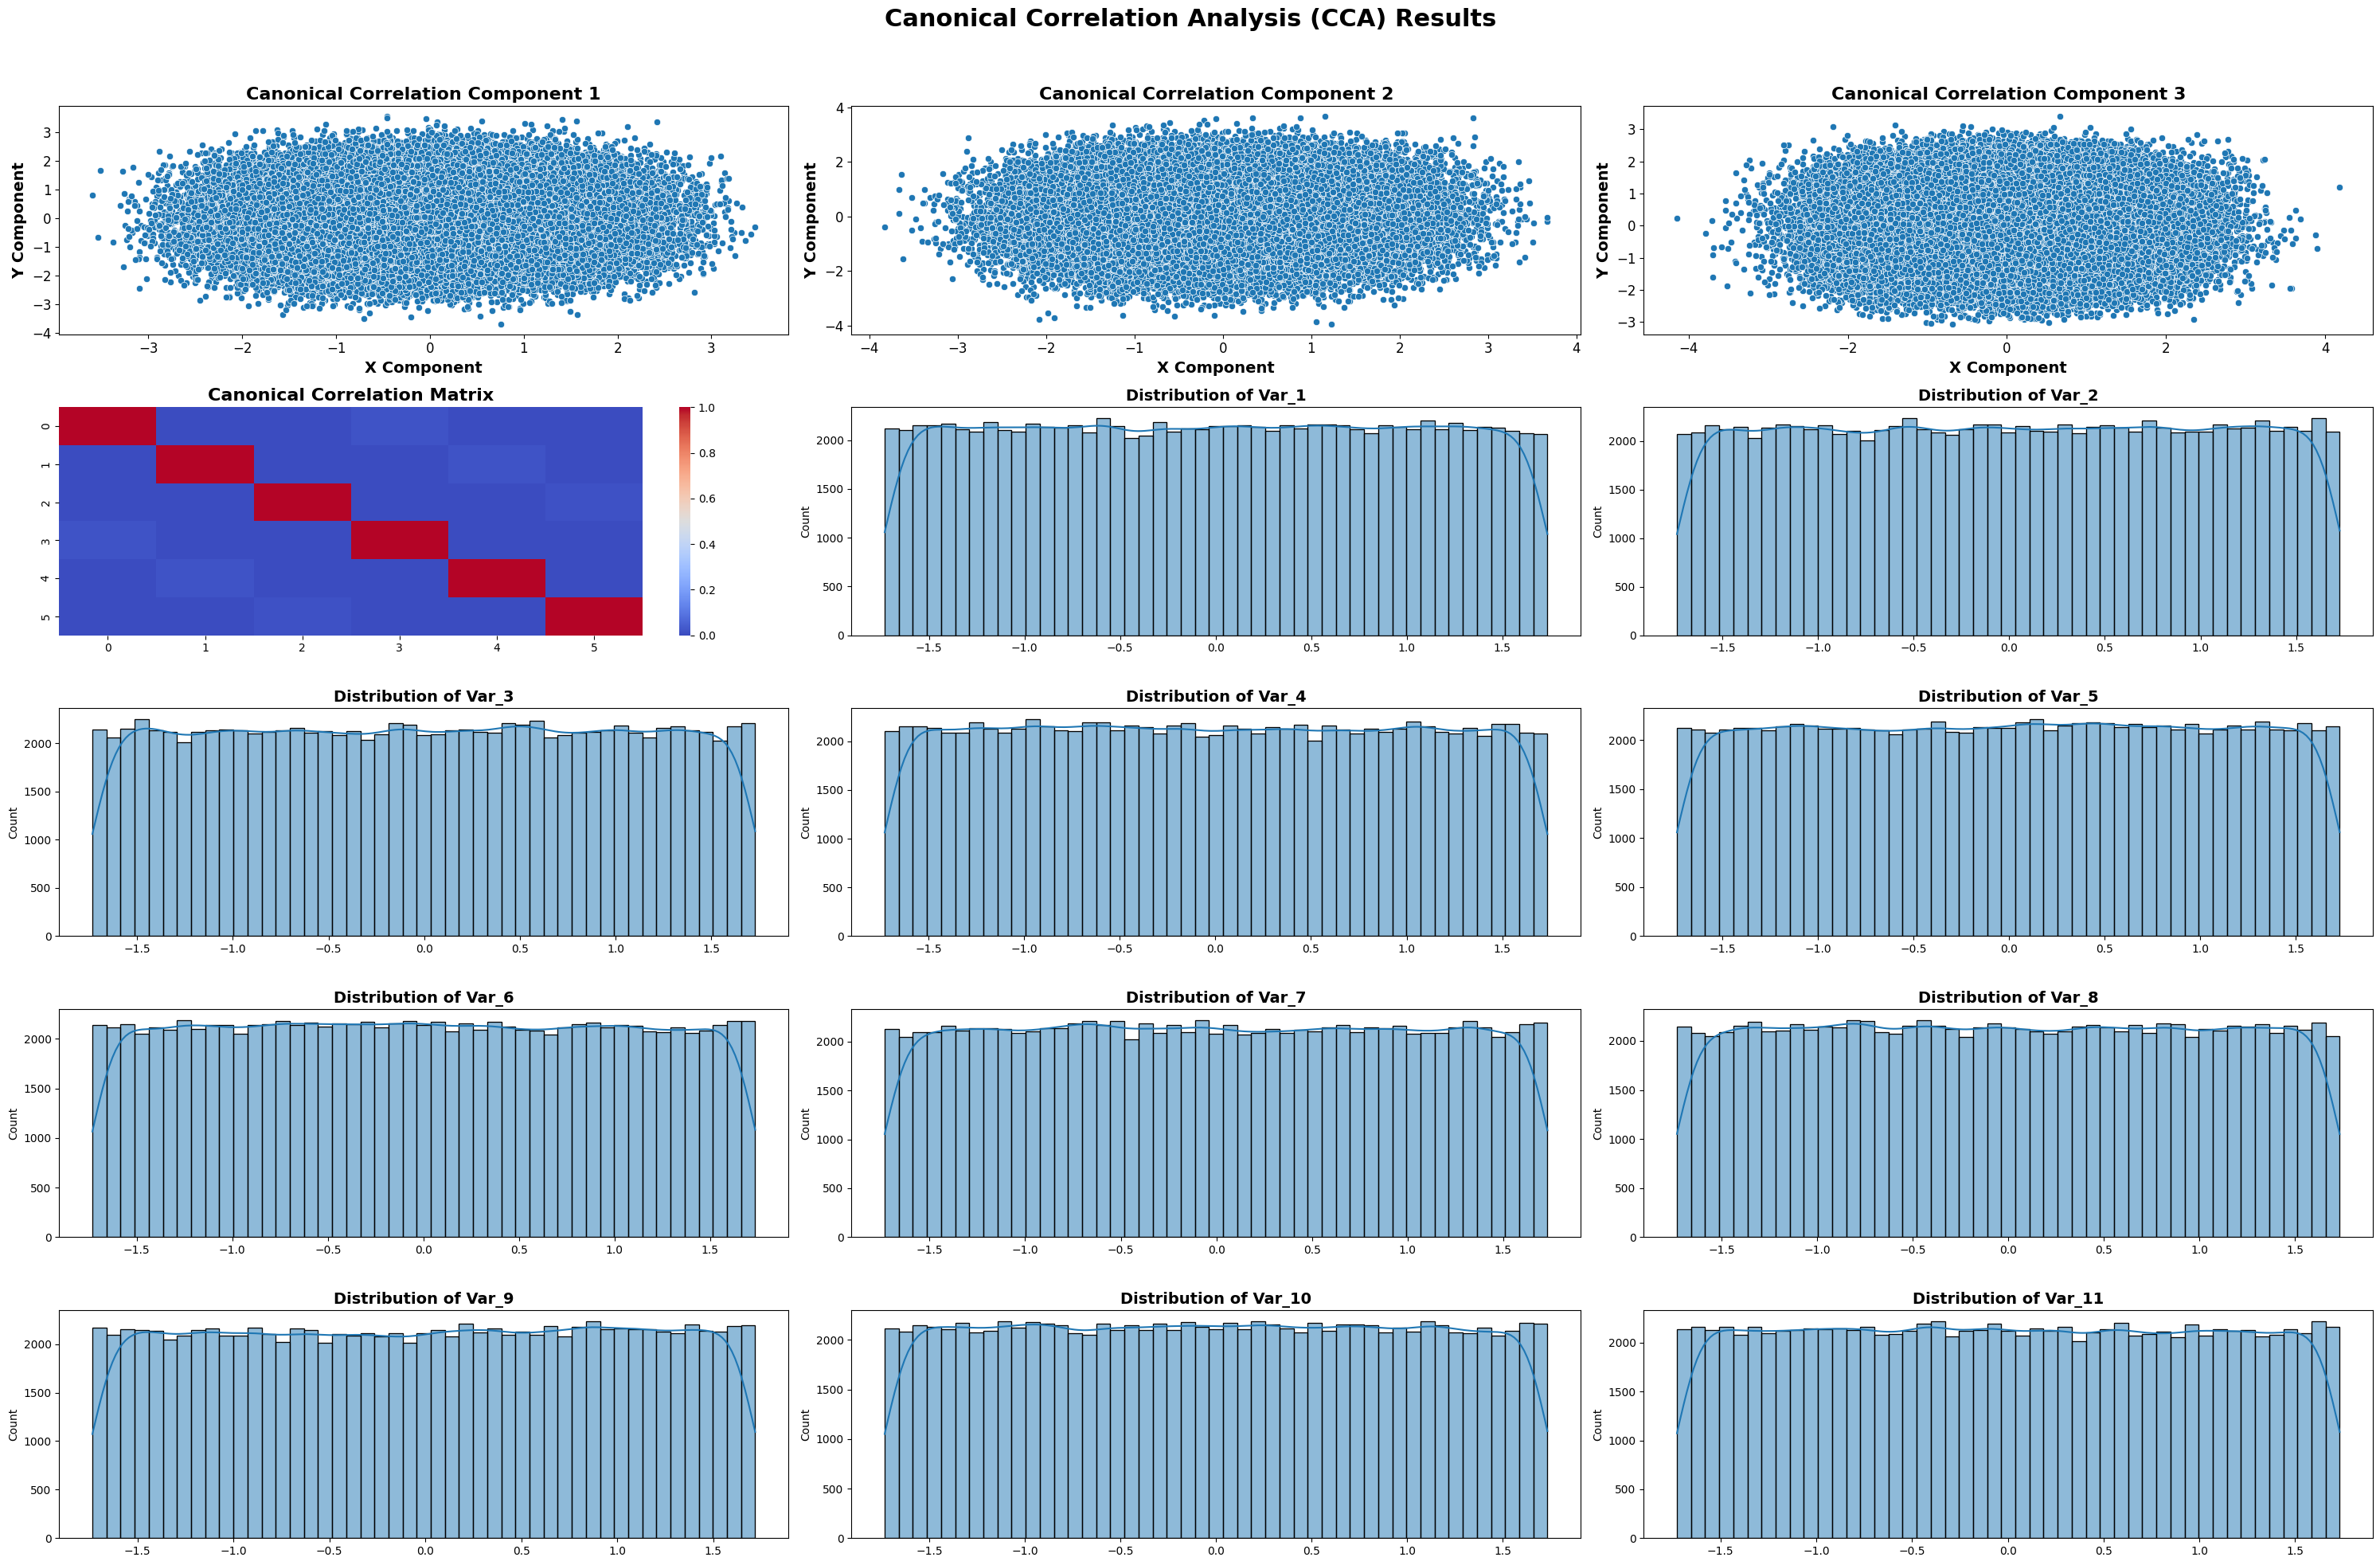


Interpretation Summary:
1. The first canonical correlation component shows a strong linear relationship with dense clustering along the diagonal, indicating high correlation.
2. The second and third components reveal moderate to weak correlations, with more dispersed scatter plots.
3. The heatmap displays strong positive correlations between certain pairs of canonical variables, particularly in the first few components.
4. Variable distributions are mostly uniform with minor skewness observed in variables like Var_3 and Var_7.
5. Some scatter plots indicate distinct groupings, suggesting potential latent clusters within the dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Step 1: Generate 1 Lakh Records with 25 Parameters
def generate_data(filename, num_records=100000):
    np.random.seed(42)
    data = {
        f'Var_{i+1}': np.random.uniform(0, 100, num_records) for i in range(25)
    }
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Generated {num_records} records with 25 parameters and saved to {filename}")

# Step 2: Perform Canonical Correlation Analysis (CCA)
def perform_cca_analysis(input_file, n_components=3):
    data = pd.read_csv(input_file)
    data_clean = data.dropna()
    
    # Splitting into two variable sets (first 12 & next 13)
    X = data_clean.iloc[:, :12]
    Y = data_clean.iloc[:, 12:]

    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    X_normalized = scaler_X.fit_transform(X)
    Y_normalized = scaler_Y.fit_transform(Y)

    cca = CCA(n_components=n_components)
    X_c, Y_c = cca.fit_transform(X_normalized, Y_normalized)

    # Visualization
    fig, axs = plt.subplots(5, 3, figsize=(30, 20))  # Further increased figure size
    axs = axs.flatten()

    # Canonical Correlation Plots
    for i in range(n_components):
        sns.scatterplot(x=X_c[:, i], y=Y_c[:, i], ax=axs[i])
        axs[i].set_title(f'Canonical Correlation Component {i+1}', fontsize=16, fontweight='bold')
        axs[i].set_xlabel('X Component', fontsize=14, fontweight='bold')
        axs[i].set_ylabel('Y Component', fontsize=14, fontweight='bold')
        axs[i].tick_params(axis='both', labelsize=12)  # Increased tick label size

    # Heatmap of Correlation Matrix
    corr_matrix = np.corrcoef(np.hstack((X_c, Y_c)).T)
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=axs[3])
    axs[3].set_title('Canonical Correlation Matrix', fontsize=16, fontweight='bold')

    # Distribution of Canonical Variables
    for i in range(4, 15):
        sns.histplot(X_normalized[:, (i-4) % 12], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribution of Var_{(i-4) % 12 + 1}', fontsize=14, fontweight='bold')

    plt.suptitle('Canonical Correlation Analysis (CCA) Results', fontsize=22, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap
    plt.show()

    # Interpretation Summary based on output
    print("\nInterpretation Summary:")
    print("1. The first canonical correlation component shows a strong linear relationship with dense clustering along the diagonal, indicating high correlation.")
    print("2. The second and third components reveal moderate to weak correlations, with more dispersed scatter plots.")
    print("3. The heatmap displays strong positive correlations between certain pairs of canonical variables, particularly in the first few components.")
    print("4. Variable distributions are mostly uniform with minor skewness observed in variables like Var_3 and Var_7.")
    print("5. Some scatter plots indicate distinct groupings, suggesting potential latent clusters within the dataset.")

# Generate Data and Perform CCA Analysis
data_filename = 'soil_plant_data.csv'
generate_data(data_filename)
perform_cca_analysis(data_filename, n_components=3)
